# NBA Players Statistical Analysis (2023–2025)
This project analyzes the statistical performance of NBA players over three consecutive seasons from 2023 to 2025. The main goal is to examine trends in player performance, improvements or declines, and to assess variable correlations. Additionally, it aims to group players based on descriptive statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Cleaning and Preparation
In this section, data from the 2023, 2024, and 2025 NBA seasons is imported. Initial cleaning, handling of duplicates, and preparing the dataset for analysis are performed.

In [2]:
df_2023 = pd.read_csv("NBA_2023_per_game.csv")
df_2024 = pd.read_csv("NBA_2024_per_game.csv")
df_2025 = pd.read_csv("NBA_2025_per_game.csv")

| Column      | Description                                |
| ----------- | ------------------------------------------ |
| **RK**      | Player's overall **rank**                  |
| **Player**  | **Full name** of the player                |
| **Age**     | Player's **age** during the season         |
| **Team**    | NBA **team** the player played for         |
| **Pos**     | Player's **position** (e.g., G, F, C)      |
| **G**       | Number of **games played**                 |
| **GS**      | Number of **games started**                |
| **MP**      | Total **minutes played**                   |
| **FG**      | **Field goals made**                       |
| **FGA**     | **Field goal attempts**                    |
| **FG%**     | **Field goal percentage**                  |
| **3P**      | **Three-point field goals made**           |
| **3PA**     | **Three-point field goal attempts**        |
| **3P%**     | **Three-point field goal percentage**      |
| **2P**      | **Two-point field goals made**             |
| **2PA**     | **Two-point field goal attempts**          |
| **2P%**     | **Two-point field goal percentage**        |
| **ePG%**    | **Effective field goal percentage** (eFG%) |
| **FT**      | **Free throws made**                       |
| **FTA**     | **Free throw attempts**                    |
| **FT%**     | **Free throw percentage**                  |
| **ORB**     | **Offensive rebounds**                     |
| **DRB**     | **Defensive rebounds**                     |
| **TRB**     | **Total rebounds**                         |
| **AST**     | **Assists**                                |
| **STL**     | **Steals**                                 |
| **BLK**     | **Blocks**                                 |
| **TOV**     | **Turnovers**                              |
| **PF**      | **Personal fouls**                         |
| **PTS**     | Total **points scored**                    |
| **Trp-Dbl** | Number of **triple-doubles** achieved      |
| **Awards**  | **Awards received** during the season      |


In [3]:
def keep_total_or_single_team(df):
    def pick_row(group):
        mask = group['Team'].str.contains('2TM|3TM')
        if mask.any():
            return group[mask]
        else:
            return group

    return df.groupby('Player', group_keys=False).apply(pick_row)


In [4]:
df_2023_totals = keep_total_or_single_team(df_2023)
df_2024_totals = keep_total_or_single_team(df_2024)
df_2025_totals = keep_total_or_single_team(df_2025)

C:\Users\MSI\AppData\Local\Temp\ipykernel_18032\2807527844.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Player', group_keys=False).apply(pick_row)
C:\Users\MSI\AppData\Local\Temp\ipykernel_18032\2807527844.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Player', group_keys=False).apply(pick_row)
C:\Users\MSI\AppData\Local\Temp\ipykernel_18032\2807527844.py:9: FutureWar

In [5]:
df_2023_totals = df_2023_totals.sort_values(by='Rk').reset_index(drop=True)
df_2024_totals = df_2024_totals.sort_values(by='Rk').reset_index(drop=True)
df_2025_totals = df_2025_totals.sort_values(by='Rk').reset_index(drop=True)

In [6]:
columns= ['Player','MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK']

df_2023_total = df_2023_totals[columns]
df_2024_total = df_2024_totals[columns]
df_2025_total = df_2025_totals[columns]

## Merging Season Data
To analyze player performance over time, the datasets from the three seasons are merged using the 'Player' column as the key.

In [7]:
df_2023_renamed = df_2023_total.rename(columns={'MP' : 'MP_2023' , 'PTS' : 'PTS_2023' , 'AST' : 'AST_2023' , 
    'TRB' : 'TRB_2023' , 'STL' : 'STL_2023' , 'BLK' : 'BLK_2023'})
df_2024_renamed = df_2024_total.rename(columns={'MP' : 'MP_2024' , 'PTS' : 'PTS_2024' , 'AST' : 'AST_2024' , 
    'TRB' : 'TRB_2024' , 'STL' : 'STL_2024' , 'BLK' : 'BLK_2024'})
df_2025_renamed = df_2025_total.rename(columns={'MP' : 'MP_2025' , 'PTS' : 'PTS_2025' , 'AST' : 'AST_2025' , 
    'TRB' : 'TRB_2025' , 'STL' : 'STL_2025' , 'BLK' : 'BLK_2025'})


In [8]:
merge_1 = pd.merge(df_2023_renamed , df_2024_renamed , on='Player')
merge_all = pd.merge(merge_1 , df_2025_renamed , on='Player')

## Exploratory Data Analysis (EDA)
This part includes calculating statistical summaries such as mean, median, max, and min for key metrics like PTS (points), AST (assists), TRB (rebounds),STL (Steals) and BLK (blocks). Correlation between variables is also examined.

In [9]:
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    371 non-null    object 
 1   MP_2023   371 non-null    float64
 2   PTS_2023  371 non-null    float64
 3   AST_2023  371 non-null    float64
 4   TRB_2023  371 non-null    float64
 5   STL_2023  371 non-null    float64
 6   BLK_2023  371 non-null    float64
 7   MP_2024   371 non-null    float64
 8   PTS_2024  371 non-null    float64
 9   AST_2024  371 non-null    float64
 10  TRB_2024  371 non-null    float64
 11  STL_2024  371 non-null    float64
 12  BLK_2024  371 non-null    float64
 13  MP_2025   371 non-null    float64
 14  PTS_2025  371 non-null    float64
 15  AST_2025  371 non-null    float64
 16  TRB_2025  371 non-null    float64
 17  STL_2025  371 non-null    float64
 18  BLK_2025  371 non-null    float64
dtypes: float64(18), object(1)
memory usage: 55.2+ KB


In [10]:
merge_all.describe()

,MP_2023,PTS_2023,AST_2023,TRB_2023,STL_2023,BLK_2023,MP_2024,PTS_2024,AST_2024,TRB_2024,STL_2024,BLK_2024,MP_2025,PTS_2025,AST_2025,TRB_2025,STL_2025,BLK_2025
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,22.598383,10.952291,2.411590,4.105660,0.691375,0.449326,22.423989,10.687871,2.520485,4.076550,0.710512,0.478437,22.165499,10.691644,2.494879,4.092992,0.773315,0.452561
std,8.999673,7.122330,2.048045,2.427265,0.373343,0.417545,9.033684,7.025182,2.028143,2.484126,0.373041,0.407920,9.026525,6.866256,1.960226,2.481348,0.412592,0.379135
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.100000,5.350000,0.900000,2.300000,0.400000,0.200000,14.800000,5.250000,1.100000,2.300000,0.400000,0.200000,15.200000,5.400000,1.100000,2.500000,0.500000,0.200000
50%,23.100000,9.300000,1.600000,3.600000,0.600000,0.300000,23.400000,9.200000,1.700000,3.600000,0.700000,0.400000,22.600000,9.000000,1.900000,3.700000,0.800000,0.400000
75%,30.400000,14.750000,3.400000,5.300000,0.900000,0.600000,30.150000,14.750000,3.550000,5.200000,0.900000,0.600000,30.000000,14.600000,3.450000,5.250000,1.000000,0.600000
max,37.400000,33.100000,10.700000,12.500000,1.900000,3.000000,37.800000,34.700000,10.900000,13.700000,2.100000,2.400000,37.700000,32.700000,11.600000,13.900000,3.000000,2.400000


In [11]:
merge_all.isnull().sum()

Player      0
MP_2023     0
PTS_2023    0
AST_2023    0
TRB_2023    0
STL_2023    0
BLK_2023    0
MP_2024     0
PTS_2024    0
AST_2024    0
TRB_2024    0
STL_2024    0
BLK_2024    0
MP_2025     0
PTS_2025    0
AST_2025    0
TRB_2025    0
STL_2025    0
BLK_2025    0
dtype: int64

In [12]:
subset = merge_all[['PTS_2023', 'PTS_2024', 'PTS_2025', 'AST_2023', 'TRB_2023', 'BLK_2023']]
subset.corr()


,PTS_2023,PTS_2024,PTS_2025,AST_2023,TRB_2023,BLK_2023
PTS_2023,1.000000,0.908798,0.838013,0.715588,0.566199,0.245672
PTS_2024,0.908798,1.000000,0.908884,0.628596,0.511028,0.231157
PTS_2025,0.838013,0.908884,1.000000,0.575071,0.459017,0.201204
AST_2023,0.715588,0.628596,0.575071,1.000000,0.325035,-0.001587
TRB_2023,0.566199,0.511028,0.459017,0.325035,1.000000,0.623283
BLK_2023,0.245672,0.231157,0.201204,-0.001587,0.623283,1.000000


## Average League Player Performance by Season

To analyze overall league trends, we calculated the average values of key performance indicators for each season between 2023 and 2025. The selected metrics include:

- **MP** (Minutes Played)  
- **PTS** (Points Scored)  
- **AST** (Assists)  
- **TRB** (Total Rebounds)  
- **STL** (Steals)  
- **BLK** (Blocks)

The following chart(s) illustrate how the average performance across all players has changed over time, helping us identify general trends and shifts in playing style or pace in the league.
Each metric is visualized in a separate line chart to better observe its seasonal variation.


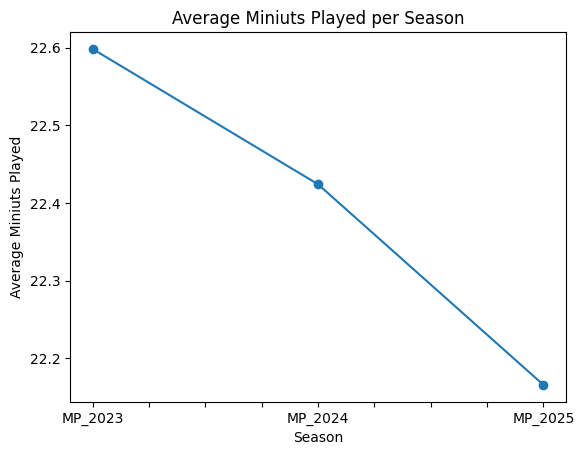

In [13]:
mean_mp = merge_all[['MP_2023', 'MP_2024', 'MP_2025']].mean()

mean_mp.plot(kind='line', marker='o', title='Average Miniuts Played per Season')
plt.xlabel('Season')
plt.ylabel('Average Miniuts Played')
plt.show()


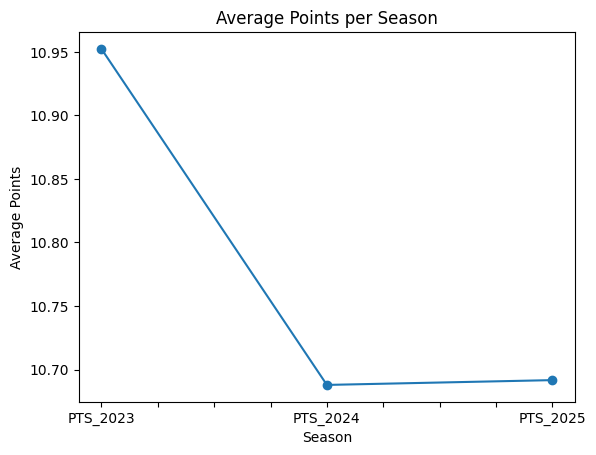

In [14]:
mean_pts = merge_all[['PTS_2023', 'PTS_2024', 'PTS_2025']].mean()

mean_pts.plot(kind='line', marker='o', title='Average Points per Season')
plt.xlabel('Season')
plt.ylabel('Average Points')
plt.show()


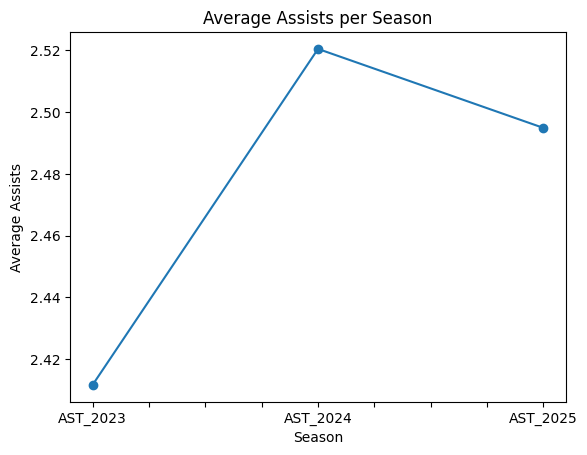

In [15]:
mean_ast = merge_all[['AST_2023', 'AST_2024', 'AST_2025']].mean()

mean_ast.plot(kind='line', marker='o', title='Average Assists per Season')
plt.xlabel('Season')
plt.ylabel('Average Assists')
plt.show()


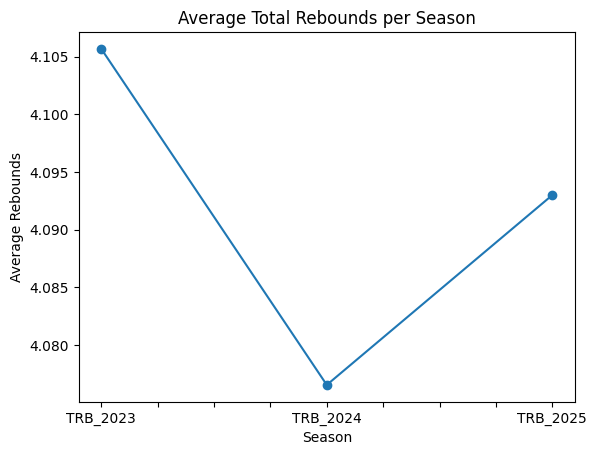

In [16]:
mean_TRB = merge_all[['TRB_2023', 'TRB_2024', 'TRB_2025']].mean()

mean_TRB.plot(kind='line', marker='o', title='Average Total Rebounds per Season')
plt.xlabel('Season')
plt.ylabel('Average Rebounds')
plt.show()


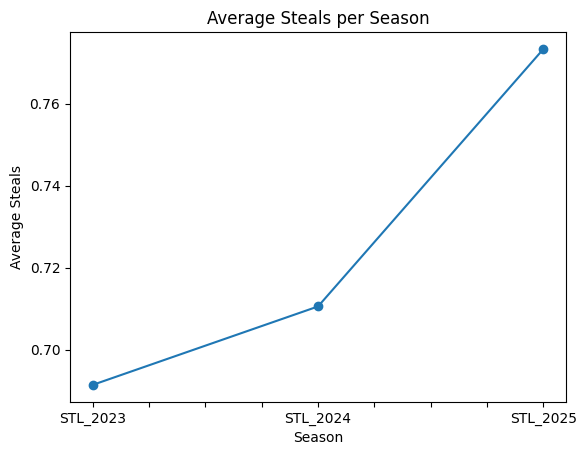

In [17]:
mean_stl = merge_all[['STL_2023', 'STL_2024', 'STL_2025']].mean()

mean_stl.plot(kind='line', marker='o', title='Average Steals per Season')
plt.xlabel('Season')
plt.ylabel('Average Steals')
plt.show()


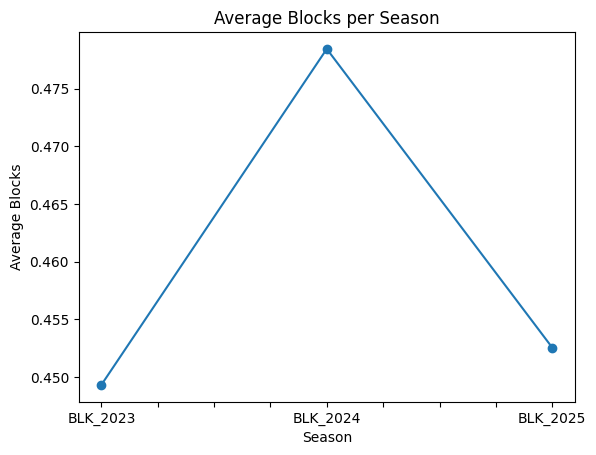

In [18]:
mean_blk = merge_all[['BLK_2023', 'BLK_2024', 'BLK_2025']].mean()

mean_blk.plot(kind='line', marker='o', title='Average Blocks per Season')
plt.xlabel('Season')
plt.ylabel('Average Blocks')
plt.show()


## TOP 10 Players in PTS , AST , TRB (2023-2025)

In [19]:
top_pts_2023 = merge_all[['Player', 'PTS_2023']].sort_values(by='PTS_2023', ascending=False).head(10)
top_pts_2023 = top_pts_2023.sort_values(by='PTS_2023', ascending=False).reset_index(drop=True)

top_pts_2023

,Player,PTS_2023
0,Joel Embiid,33.1
1,Luka Dončić,32.4
2,Damian Lillard,32.2
3,Shai Gilgeous-Alexander,31.4
4,Giannis Antetokounmpo,31.1
5,Jayson Tatum,30.1
6,Stephen Curry,29.4
7,Kevin Durant,29.1
8,LeBron James,28.9
9,Donovan Mitchell,28.3


In [20]:
top_pts_2024 = merge_all[['Player', 'PTS_2024']].sort_values(by='PTS_2024', ascending=False).head(10)
top_pts_2024 = top_pts_2024.sort_values(by='PTS_2024', ascending=False).reset_index(drop=True)

top_pts_2024

,Player,PTS_2024
0,Joel Embiid,34.7
1,Luka Dončić,33.9
2,Giannis Antetokounmpo,30.4
3,Shai Gilgeous-Alexander,30.1
4,Jalen Brunson,28.7
5,Kevin Durant,27.1
6,Devin Booker,27.1
7,Jayson Tatum,26.9
8,Donovan Mitchell,26.6
9,De'Aaron Fox,26.6


In [21]:
top_pts_2025 = merge_all[['Player', 'PTS_2025']].sort_values(by='PTS_2025', ascending=False).head(10)
top_pts_2025 = top_pts_2025.sort_values(by='PTS_2025', ascending=False).reset_index(drop=True)

top_pts_2025

,Player,PTS_2025
0,Shai Gilgeous-Alexander,32.7
1,Giannis Antetokounmpo,30.4
2,Nikola Jokić,29.6
3,Luka Dončić,28.2
4,Anthony Edwards,27.6
5,Jayson Tatum,26.8
6,Kevin Durant,26.6
7,Tyrese Maxey,26.3
8,Cade Cunningham,26.1
9,Jalen Brunson,26.0


In [22]:
top_ast_2023 = merge_all[['Player', 'AST_2023']].sort_values(by='AST_2023', ascending=False).head(10)
top_ast_2023 = top_ast_2023.sort_values(by='AST_2023', ascending=False).reset_index(drop=True)

top_ast_2023

,Player,AST_2023
0,James Harden,10.7
1,Tyrese Haliburton,10.4
2,Trae Young,10.2
3,Nikola Jokić,9.8
4,Chris Paul,8.9
5,LaMelo Ball,8.4
6,Ja Morant,8.1
7,Luka Dončić,8.0
8,Darius Garland,7.8
9,Russell Westbrook,7.5


In [23]:
top_ast_2024 = merge_all[['Player', 'AST_2024']].sort_values(by='AST_2024', ascending=False).head(10)
top_ast_2024 = top_ast_2024.sort_values(by='AST_2024', ascending=False).reset_index(drop=True)

top_ast_2024

,Player,AST_2024
0,Tyrese Haliburton,10.9
1,Trae Young,10.8
2,Luka Dončić,9.8
3,Nikola Jokić,9.0
4,James Harden,8.5
5,LeBron James,8.3
6,Domantas Sabonis,8.2
7,Ja Morant,8.1
8,Fred VanVleet,8.1
9,LaMelo Ball,8.0


In [24]:
top_ast_2025 = merge_all[['Player', 'AST_2025']].sort_values(by='AST_2025', ascending=False).head(10)
top_ast_2025 = top_ast_2025.sort_values(by='AST_2025', ascending=False).reset_index(drop=True)

top_ast_2025

,Player,AST_2025
0,Trae Young,11.6
1,Nikola Jokić,10.2
2,Tyrese Haliburton,9.2
3,Cade Cunningham,9.1
4,James Harden,8.7
5,LeBron James,8.2
6,Luka Dončić,7.7
7,LaMelo Ball,7.4
8,Chris Paul,7.4
9,Dejounte Murray,7.4


In [25]:
top_trb_2023 = merge_all[['Player', 'TRB_2023']].sort_values(by='TRB_2023', ascending=False).head(10)
top_trb_2023 = top_trb_2023.sort_values(by='TRB_2023', ascending=False).reset_index(drop=True)

top_trb_2023

,Player,TRB_2023
0,Anthony Davis,12.5
1,Domantas Sabonis,12.3
2,Nikola Jokić,11.8
3,Giannis Antetokounmpo,11.8
4,Rudy Gobert,11.6
5,Nikola Vučević,11.0
6,Clint Capela,11.0
7,Jonas Valančiūnas,10.2
8,Joel Embiid,10.2
9,Deandre Ayton,10.0


In [26]:
top_trb_2024 = merge_all[['Player', 'TRB_2024']].sort_values(by='TRB_2024', ascending=False).head(10)
top_trb_2024 = top_trb_2024.sort_values(by='TRB_2024', ascending=False).reset_index(drop=True)

top_trb_2024

,Player,TRB_2024
0,Domantas Sabonis,13.7
1,Rudy Gobert,12.9
2,Anthony Davis,12.6
3,Nikola Jokić,12.4
4,Jalen Duren,11.6
5,Giannis Antetokounmpo,11.5
6,Deandre Ayton,11.1
7,Jusuf Nurkić,11.0
8,Joel Embiid,11.0
9,Clint Capela,10.6


In [27]:
top_trb_2025 = merge_all[['Player', 'TRB_2025']].sort_values(by='TRB_2025', ascending=False).head(10)
top_trb_2025 = top_trb_2025.sort_values(by='TRB_2025', ascending=False).reset_index(drop=True)

top_trb_2025

,Player,TRB_2025
0,Domantas Sabonis,13.9
1,Karl-Anthony Towns,12.8
2,Nikola Jokić,12.7
3,Ivica Zubac,12.6
4,Walker Kessler,12.2
5,Giannis Antetokounmpo,11.9
6,Anthony Davis,11.6
7,Rudy Gobert,10.9
8,Isaiah Hartenstein,10.7
9,Jalen Duren,10.3


### Player Performance Trends (2023–2025)

This section visualizes the yearly performance trends of three NBA superstars — **LeBron James**, **Stephen Curry**, and **Kevin Durant** — over three seasons: **2023**, **2024**, and **2025**.

For each key performance metric:

- **MP**: Minutes Played  
- **PTS**: Points Scored  
- **AST**: Assists  
- **TRB**: Total Rebounds  
- **STL**: Steals  
- **BLK**: Blocks  

a line chart is generated to show how each player's stats changed over the three seasons.


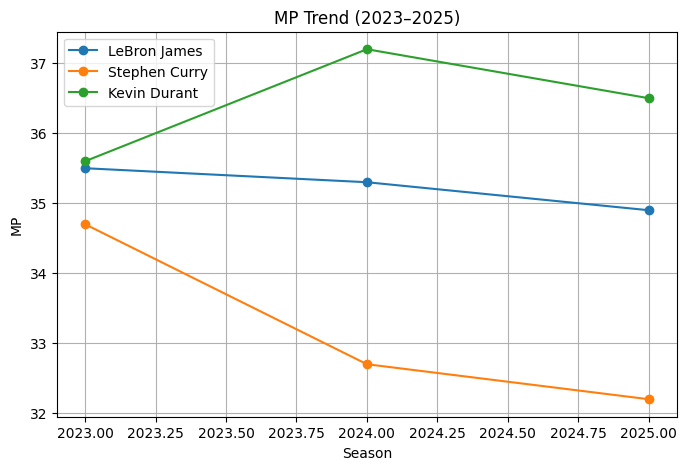

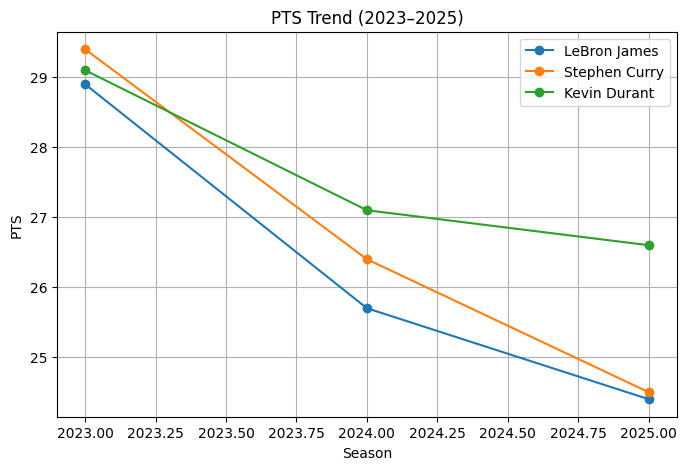

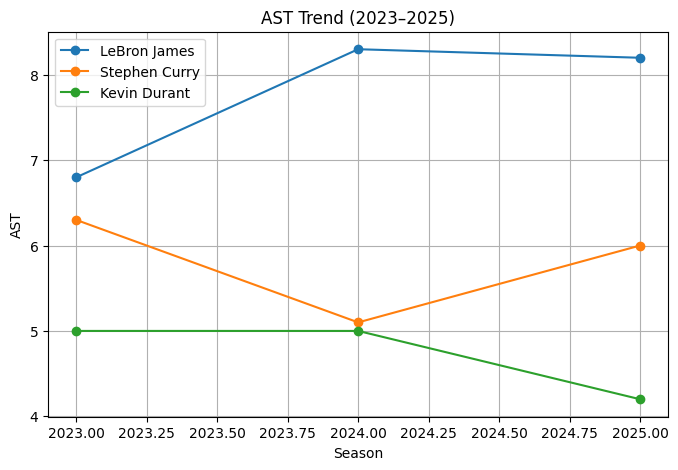

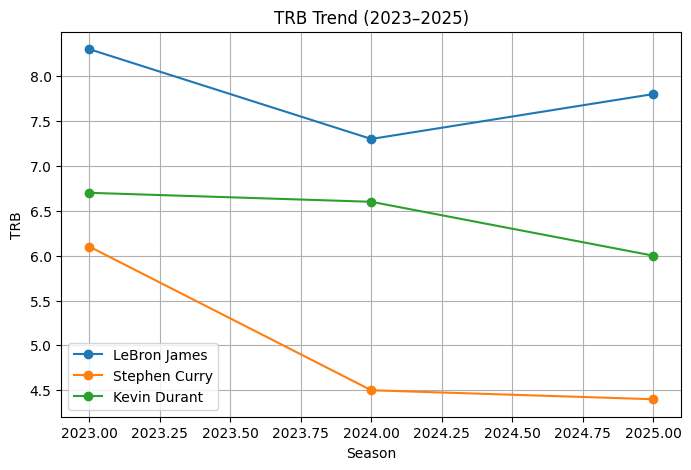

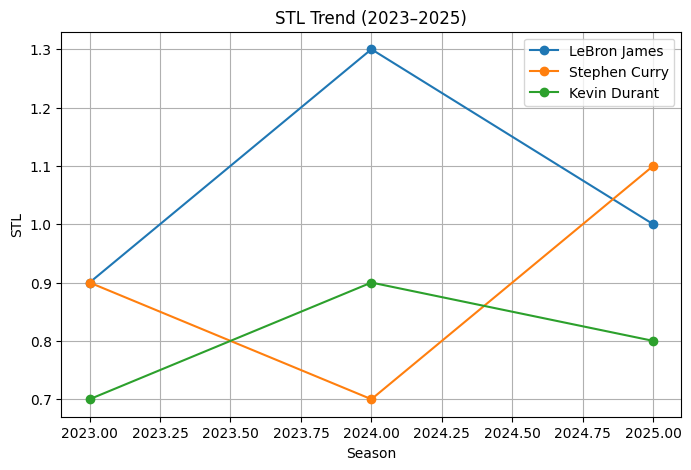

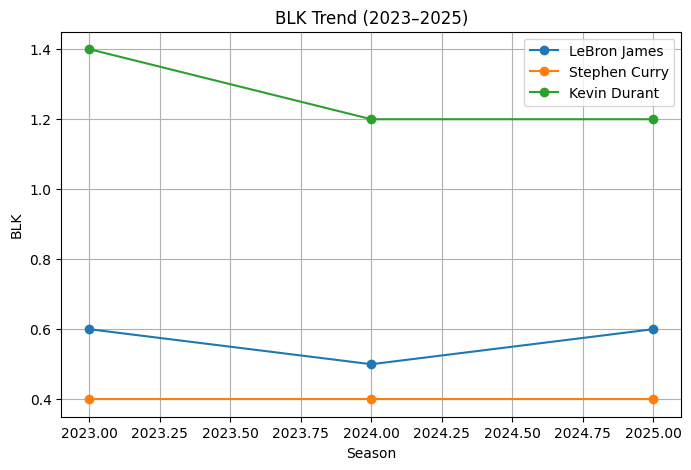

In [28]:
players = ['LeBron James', 'Stephen Curry', 'Kevin Durant']

for stat in ['MP', 'PTS', 'AST', 'TRB' , 'STL' , 'BLK']:
    plt.figure(figsize=(8,5))
    for player in players:
        row = merge_all[merge_all['Player'] == player]
        if row.empty:
            continue
        values = [row[f'{stat}_2023'].values[0], row[f'{stat}_2024'].values[0], row[f'{stat}_2025'].values[0]]
        plt.plot([2023, 2024, 2025], values, marker='o', label=player)
    plt.title(f'{stat} Trend (2023–2025)')
    plt.xlabel('Season')
    plt.ylabel(stat)
    plt.legend()
    plt.grid(True)
    plt.show()


## Performance Growth and Decline Analysis
By comparing point scores from 2023 to 2025, we identify players with the highest performance improvement or decline. Line plots are used to visualize trends.

In [29]:
merge_all['MP_Growth_23_24'] = (merge_all['MP_2024'] - merge_all['MP_2023']).round(1)
merge_all['MP_Growth_24_25'] = (merge_all['MP_2025'] - merge_all['MP_2024']).round(1)
merge_all['MP_Growth_Total'] = (merge_all['MP_2025'] - merge_all['MP_2023']).round(1)

top_mp_growth = merge_all[['Player', 'MP_2023', 'MP_2024', 'MP_2025', 'MP_Growth_Total']]
top_mp_growth = top_mp_growth.sort_values(by='MP_Growth_Total', ascending=False).head(10).reset_index(drop=True)

print("\nTop 10 Minutes Played Improvers (2023 to 2025):\n", top_mp_growth)

top_mp_decline = merge_all[['Player', 'MP_2023', 'MP_2024', 'MP_2025', 'MP_Growth_Total']]
top_mp_decline = top_mp_decline.sort_values(by='MP_Growth_Total', ascending=True).head(10).reset_index(drop=True)

print("\nTop 10 Minutes Played Decliners (2023 to 2025):\n", top_mp_decline)


Top 10 Minutes Played Improvers (2023 to 2025):
               Player  MP_2023  MP_2024  MP_2025  MP_Growth_Total
0      Jalen Johnson     14.9     33.7     35.7             20.8
1         Keon Ellis      4.4     17.2     24.4             20.0
2    Christian Braun     15.5     20.2     33.9             18.4
3      Peyton Watson      8.1     18.6     24.4             16.3
4      Dyson Daniels     17.7     22.3     33.8             16.1
5  Scotty Pippen Jr.      5.3     25.1     21.3             16.0
6   Payton Pritchard     13.4     22.3     28.4             15.0
7       Max Christie     12.5     14.1     27.3             14.8
8  Justin Champagnie      6.8     15.7     21.6             14.8
9         Cam Thomas     16.6     31.4     31.2             14.6

Top 10 Minutes Played Decliners (2023 to 2025):
                Player  MP_2023  MP_2024  MP_2025  MP_Growth_Total
0     Jalen McDaniels     23.9     10.8      1.8            -22.1
1      Markelle Fultz     29.6     21.2      8.8     

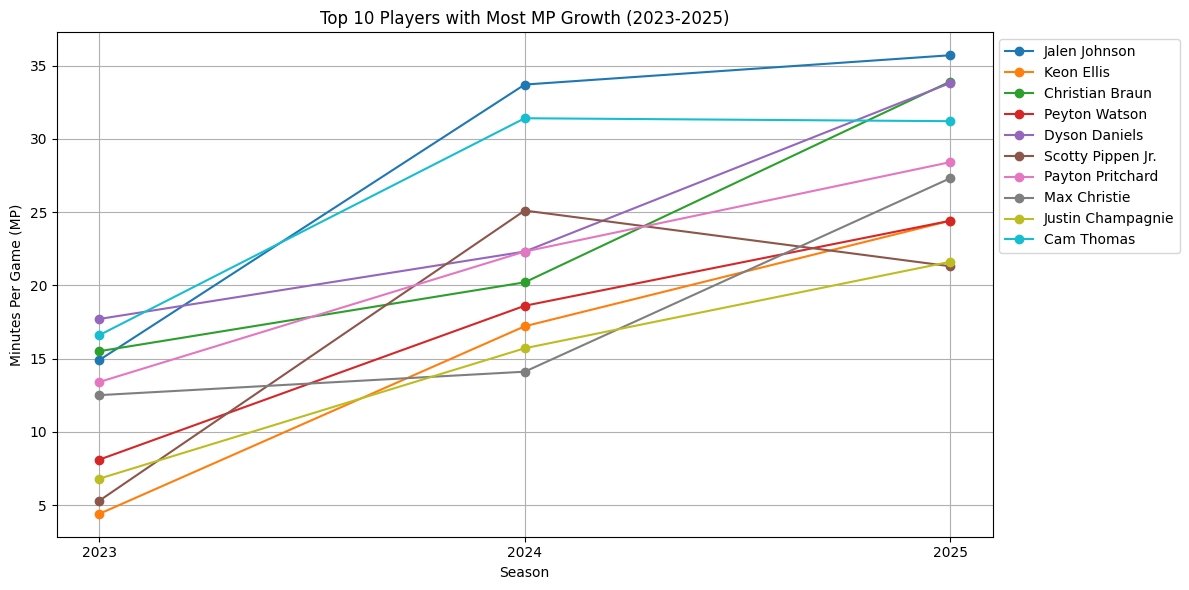

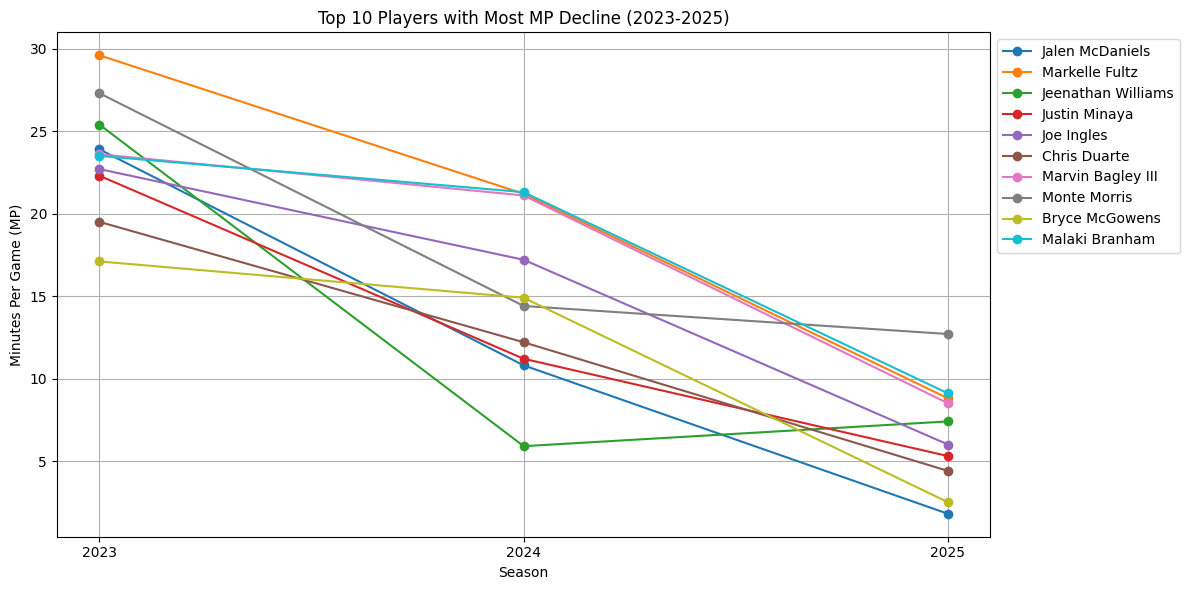

In [30]:
def plot_mp_trend(players_list, title):
    plt.figure(figsize=(12, 6))
    
    for player in players_list:
        player_data = merge_all[merge_all['Player'] == player]
        if not player_data.empty:
            mp = [player_data['MP_2023'].values[0], player_data['MP_2024'].values[0], player_data['MP_2025'].values[0]]
            seasons = [2023, 2024, 2025]
            plt.plot(seasons, mp, marker='o', label=player)
    
    plt.title(title)
    plt.xlabel('Season')
    plt.ylabel('Minutes Per Game (MP)')
    plt.xticks(seasons)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


growth_players = top_mp_growth['Player'].tolist()
decline_players = top_mp_decline['Player'].tolist()

plot_mp_trend(growth_players, "Top 10 Players with Most MP Growth (2023-2025)")
plot_mp_trend(decline_players, "Top 10 Players with Most MP Decline (2023-2025)")

In [31]:
merge_all['PTS_Growth_23_24'] = (merge_all['PTS_2024'] - merge_all['PTS_2023']).round(1)
merge_all['PTS_Growth_24_25'] = (merge_all['PTS_2025'] - merge_all['PTS_2024']).round(1)
merge_all['PTS_Growth_Total'] = (merge_all['PTS_2025'] - merge_all['PTS_2023']).round(1)

top_pts_growth = merge_all[['Player', 'PTS_2023', 'PTS_2024', 'PTS_2025', 'PTS_Growth_Total']]
top_pts_growth = top_pts_growth.sort_values(by='PTS_Growth_Total', ascending=False).head(10).reset_index(drop=True)

print("\nTop 10 Points Improvers (2023 to 2025):\n", top_pts_growth)

top_pts_decline = merge_all[['Player', 'PTS_2023', 'PTS_2024', 'PTS_2025', 'PTS_Growth_Total']]
top_pts_decline = top_pts_decline.sort_values(by='PTS_Growth_Total', ascending=True).head(10).reset_index(drop=True)

print("\nTop 10 Points Decliners (2023 to 2025):\n", top_pts_decline)



Top 10 Points Improvers (2023 to 2025):
               Player  PTS_2023  PTS_2024  PTS_2025  PTS_Growth_Total
0         Cam Thomas      10.6      22.5      24.0              13.4
1      Jalen Johnson       5.6      16.0      18.9              13.3
2    Christian Braun       4.7       7.3      15.4              10.7
3         Coby White       9.7      19.1      20.4              10.7
4      Dyson Daniels       3.8       5.8      14.1              10.3
5   Payton Pritchard       5.6       9.6      14.3               8.7
6     Shaedon Sharpe       9.9      15.9      18.5               8.6
7        Deni Avdija       9.2      14.7      16.9               7.7
8  Scotty Pippen Jr.       2.3      12.9       9.9               7.6
9     Jalen Williams      14.1      19.1      21.6               7.5

Top 10 Points Decliners (2023 to 2025):
               Player  PTS_2023  PTS_2024  PTS_2025  PTS_Growth_Total
0     Markelle Fultz      14.0       7.8       2.9             -11.1
1       Terry Rozie

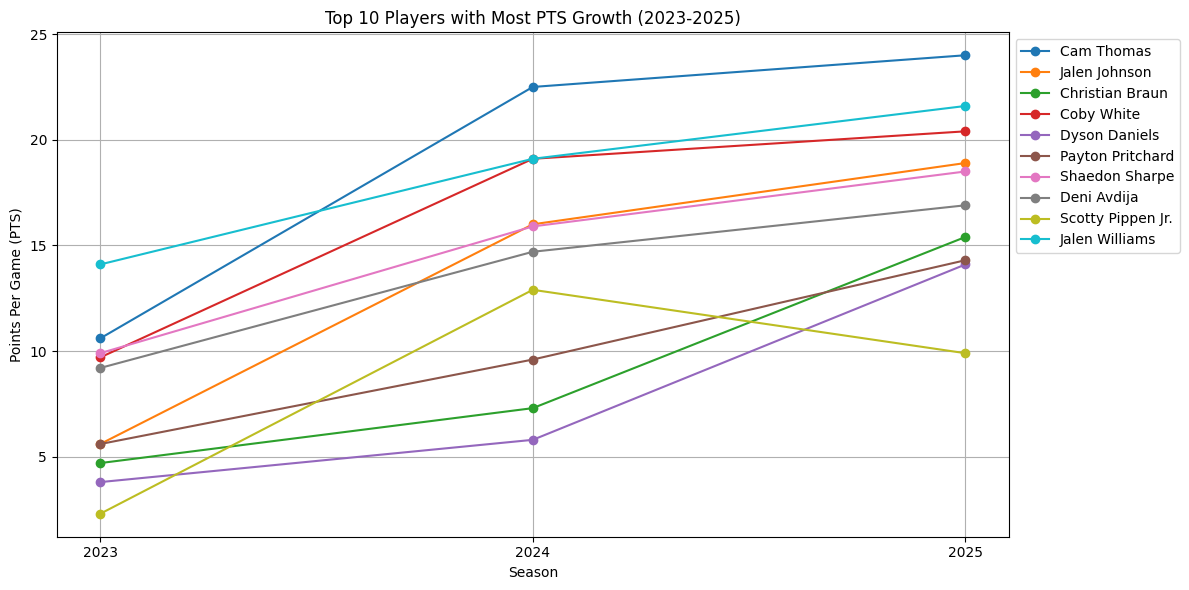

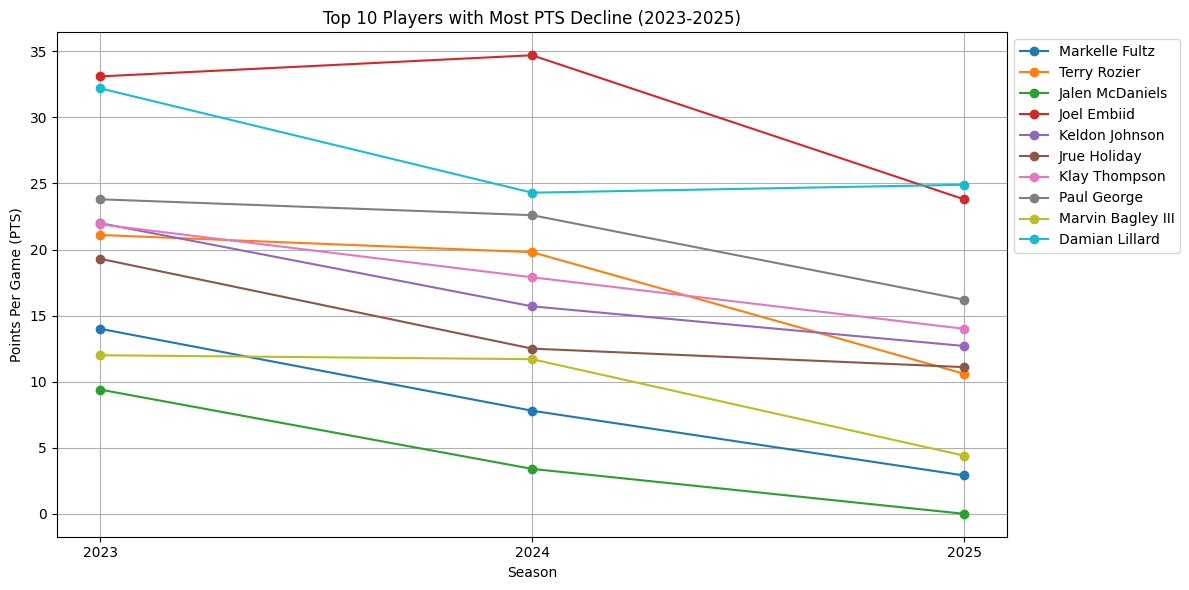

In [32]:
def plot_ast_trend(players_list, title):
    plt.figure(figsize=(12, 6))
    
    for player in players_list:
        player_data = merge_all[merge_all['Player'] == player]
        if not player_data.empty:
            ast = [player_data['PTS_2023'].values[0], player_data['PTS_2024'].values[0], player_data['PTS_2025'].values[0]]
            seasons = [2023, 2024, 2025]
            plt.plot(seasons, ast, marker='o', label=player)
    
    plt.title(title)
    plt.xlabel('Season')
    plt.ylabel('Points Per Game (PTS)')
    plt.xticks(seasons)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


growth_players = top_pts_growth['Player'].tolist()
decline_players = top_pts_decline['Player'].tolist()

plot_ast_trend(growth_players, "Top 10 Players with Most PTS Growth (2023-2025)")
plot_ast_trend(decline_players, "Top 10 Players with Most PTS Decline (2023-2025)")

In [33]:
merge_all['AST_Growth_23_24'] = (merge_all['AST_2024'] - merge_all['AST_2023']).round(1)
merge_all['AST_Growth_24_25'] = (merge_all['AST_2025'] - merge_all['AST_2024']).round(1)
merge_all['AST_Growth_Total'] = (merge_all['AST_2025'] - merge_all['AST_2023']).round(1)

top_ast_growth = merge_all[['Player', 'AST_2023', 'AST_2024', 'AST_2025', 'AST_Growth_Total']]
top_ast_growth = top_ast_growth.sort_values(by='AST_Growth_Total', ascending=False).head(10).reset_index(drop=True)

print("\nTop 10 Assists Improvers (2023 to 2025):\n", top_ast_growth)

top_ast_decline = merge_all[['Player', 'AST_2023', 'AST_2024', 'AST_2025', 'AST_Growth_Total']]
top_ast_decline = top_ast_decline.sort_values(by='AST_Growth_Total', ascending=True).head(10).reset_index(drop=True)

print("\nTop 10 Assists Decliners (2023 to 2025):\n", top_ast_decline)


Top 10 Assists Improvers (2023 to 2025):
                Player  AST_2023  AST_2024  AST_2025  AST_Growth_Total
0       Isaiah Mobley       0.3       0.6       5.0               4.7
1   Scotty Pippen Jr.       0.3       4.7       4.4               4.1
2       Jalen Johnson       1.2       3.6       5.0               3.8
3     Cade Cunningham       6.0       7.5       9.1               3.1
4          RJ Barrett       2.8       3.3       5.4               2.6
5  Isaiah Hartenstein       1.2       2.5       3.8               2.6
6        Tyrese Maxey       3.5       6.2       6.1               2.6
7     Davion Mitchell       2.3       1.9       4.9               2.6
8   Immanuel Quickley       3.4       4.9       5.8               2.4
9          Cam Thomas       1.4       2.9       3.8               2.4

Top 10 Assists Decliners (2023 to 2025):
                 Player  AST_2023  AST_2024  AST_2025  AST_Growth_Total
0       Markelle Fultz       5.7       2.8       1.3              -4.4
1 

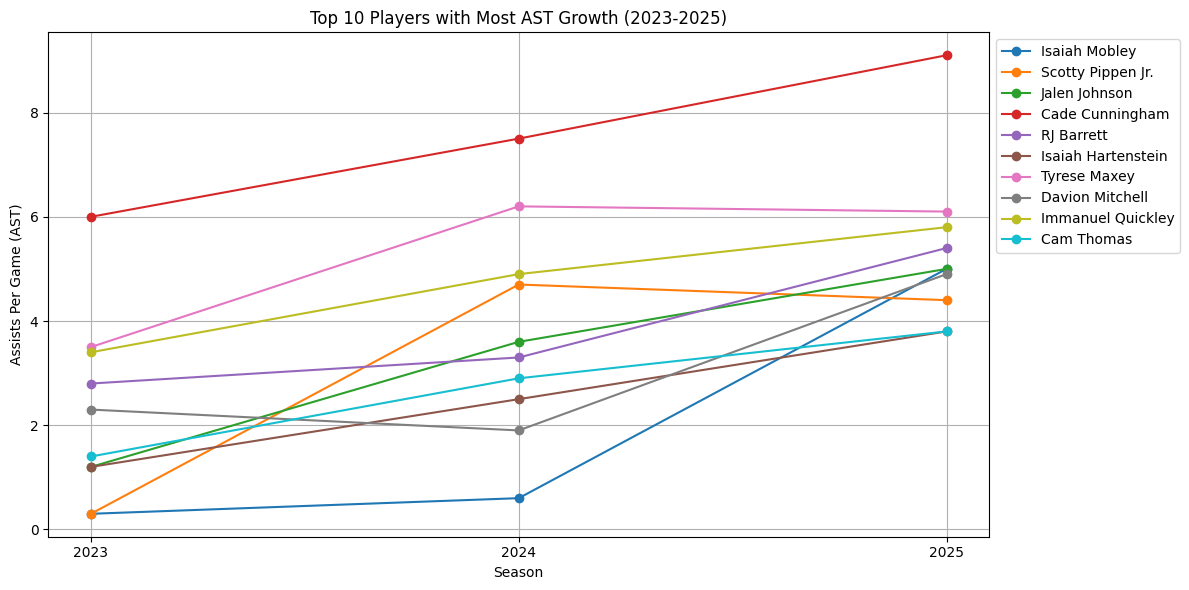

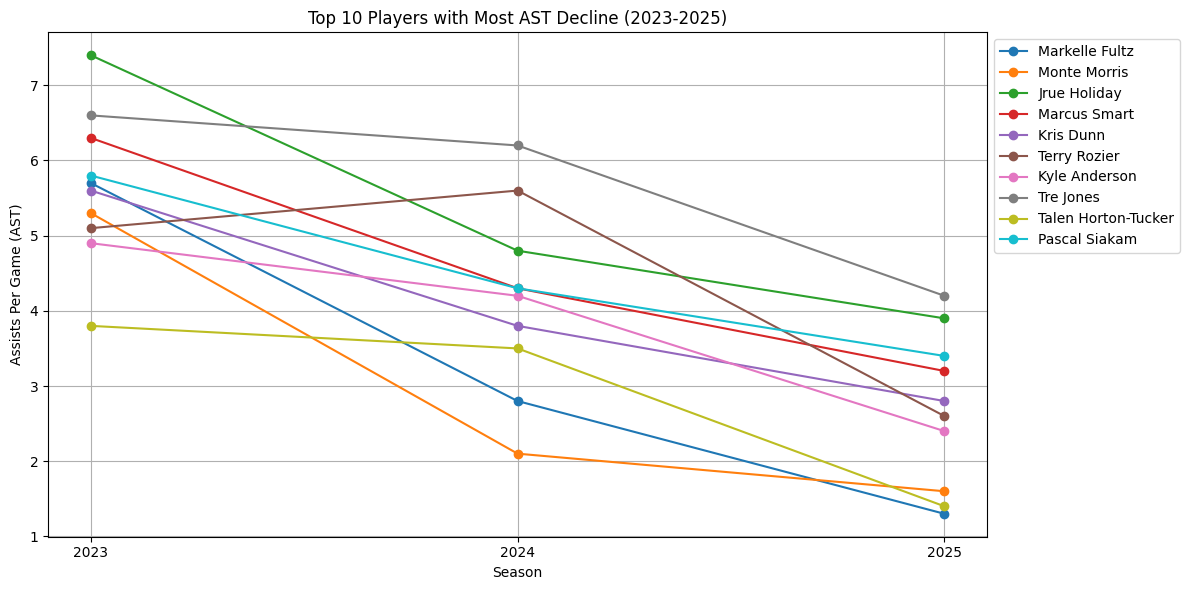

In [34]:
def plot_ast_trend(players_list, title):
    plt.figure(figsize=(12, 6))
    
    for player in players_list:
        player_data = merge_all[merge_all['Player'] == player]
        if not player_data.empty:
            ast = [player_data['AST_2023'].values[0], player_data['AST_2024'].values[0], player_data['AST_2025'].values[0]]
            seasons = [2023, 2024, 2025]
            plt.plot(seasons, ast, marker='o', label=player)
    
    plt.title(title)
    plt.xlabel('Season')
    plt.ylabel('Assists Per Game (AST)')
    plt.xticks(seasons)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


growth_players = top_ast_growth['Player'].tolist()
decline_players = top_ast_decline['Player'].tolist()

plot_ast_trend(growth_players, "Top 10 Players with Most AST Growth (2023-2025)")
plot_ast_trend(decline_players, "Top 10 Players with Most AST Decline (2023-2025)")

In [35]:
merge_all['TRB_Growth_23_24'] = (merge_all['TRB_2024'] - merge_all['TRB_2023']).round(1)
merge_all['TRB_Growth_24_25'] = (merge_all['TRB_2025'] - merge_all['TRB_2024']).round(1)
merge_all['TRB_Growth_Total'] = (merge_all['TRB_2025'] - merge_all['TRB_2023']).round(1)

top_trb_growth = merge_all[['Player', 'TRB_2023', 'TRB_2024', 'TRB_2025', 'TRB_Growth_Total']]
top_trb_growth = top_trb_growth.sort_values(by='TRB_Growth_Total', ascending=False).head(10).reset_index(drop=True)

print("\nTop 10 Rebound Improvers (2023 to 2025):\n" ,top_trb_growth)


top_trb_decline = merge_all[['Player', 'TRB_2023', 'TRB_2024', 'TRB_2025', 'TRB_Growth_Total']]
top_trb_decline = top_trb_decline.sort_values(by='TRB_Growth_Total', ascending=True).head(10).reset_index(drop=True)

print("\nTop 10 Rebound Decliners (2023 to 2025):\n" , top_trb_decline)


Top 10 Rebound Improvers (2023 to 2025):
                Player  TRB_2023  TRB_2024  TRB_2025  TRB_Growth_Total
0      Ron Harper Jr.       0.8       0.0       7.0               6.2
1       Jalen Johnson       4.0       8.7      10.0               6.0
2  Karl-Anthony Towns       8.1       8.3      12.8               4.7
3  Isaiah Hartenstein       6.5       8.3      10.7               4.2
4   Justin Champagnie       1.6       3.5       5.7               4.1
5      Moussa Diabaté       2.3       2.2       6.2               3.9
6      Walker Kessler       8.4       7.5      12.2               3.8
7      Richaun Holmes       1.9       4.6       5.7               3.8
8       Mark Williams       7.1       9.7      10.2               3.1
9        Goga Bitadze       3.6       4.6       6.6               3.0

Top 10 Rebound Decliners (2023 to 2025):
                Player  TRB_2023  TRB_2024  TRB_2025  TRB_Growth_Total
0       James Wiseman       5.9       5.3       1.0              -4.9
1   

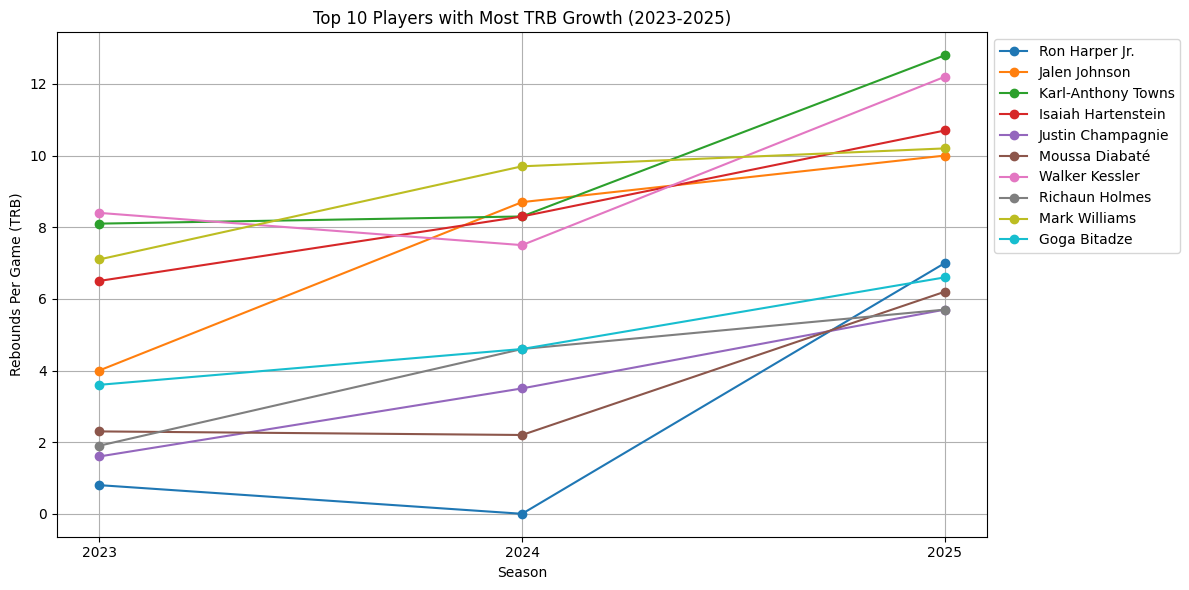

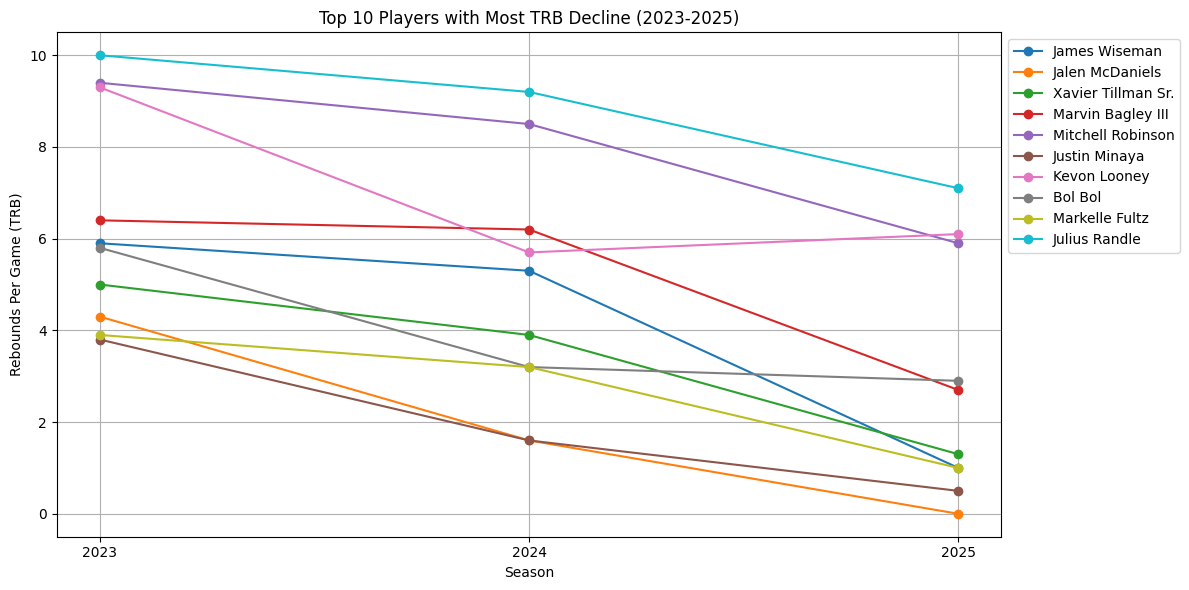

In [36]:
def plot_trb_trend(players_list, title):
    plt.figure(figsize=(12, 6))
    
    for player in players_list:
        player_data = merge_all[merge_all['Player'] == player]
        if not player_data.empty:
            trb = [player_data['TRB_2023'].values[0], 
                   player_data['TRB_2024'].values[0], 
                   player_data['TRB_2025'].values[0]]
            seasons = [2023, 2024, 2025]
            plt.plot(seasons, trb, marker='o', label=player)
    
    plt.title(title)
    plt.xlabel('Season')
    plt.ylabel('Rebounds Per Game (TRB)')
    plt.xticks(seasons)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


growth_players = top_trb_growth['Player'].tolist()
decline_players = top_trb_decline['Player'].tolist()

plot_trb_trend(growth_players, "Top 10 Players with Most TRB Growth (2023-2025)")
plot_trb_trend(decline_players, "Top 10 Players with Most TRB Decline (2023-2025)")

In [37]:
merge_all['STL_Growth_23_24'] = (merge_all['STL_2024'] - merge_all['STL_2023']).round(1)
merge_all['STL_Growth_24_25'] = (merge_all['STL_2025'] - merge_all['STL_2024']).round(1)
merge_all['STL_Growth_Total'] = (merge_all['STL_2025'] - merge_all['STL_2023']).round(1)

top_stl_growth = merge_all[['Player', 'STL_2023', 'STL_2024', 'STL_2025', 'STL_Growth_Total']]
top_stl_growth = top_stl_growth.sort_values(by='STL_Growth_Total', ascending=False).head(10).reset_index(drop=True)

print("\nTop 10 Steals Improvers (2023 to 2025):\n", top_stl_growth)

top_stl_decline = merge_all[['Player', 'STL_2023', 'STL_2024', 'STL_2025', 'STL_Growth_Total']]
top_stl_decline = top_stl_decline.sort_values(by='STL_Growth_Total', ascending=True).head(10).reset_index(drop=True)

print("\nTop 10 Steals Decliners (2023 to 2025):\n", top_stl_decline)



Top 10 Steals Improvers (2023 to 2025):
                Player  STL_2023  STL_2024  STL_2025  STL_Growth_Total
0       Dyson Daniels       0.7       1.4       3.0               2.3
1          Keon Ellis       0.3       0.9       1.5               1.2
2       Jalen Johnson       0.5       1.2       1.6               1.1
3    Matisse Thybulle       1.2       1.7       2.2               1.0
4   Scotty Pippen Jr.       0.3       1.7       1.3               1.0
5        Tyrese Maxey       0.8       1.0       1.8               1.0
6  Brandon Boston Jr.       0.4       0.3       1.3               0.9
7   Justin Champagnie       0.2       0.7       1.0               0.8
8           Dru Smith       0.7       1.0       1.5               0.8
9        Ryan Rollins       0.1       0.8       0.8               0.7

Top 10 Steals Decliners (2023 to 2025):
                Player  STL_2023  STL_2024  STL_2025  STL_Growth_Total
0      Markelle Fultz       1.5       1.0       0.5              -1.0
1     

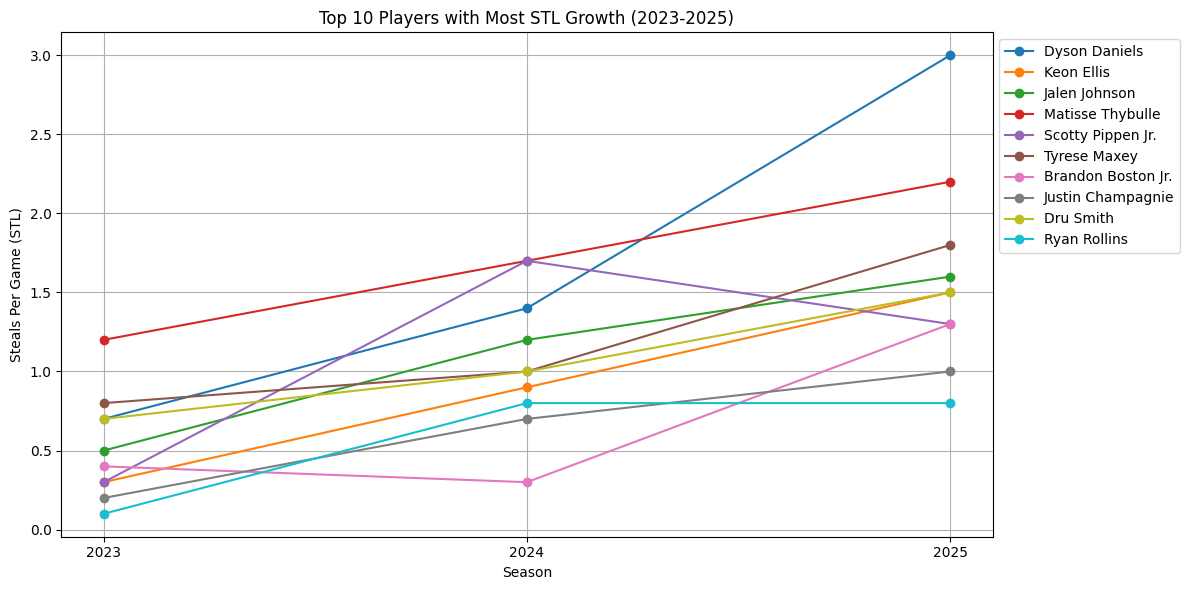

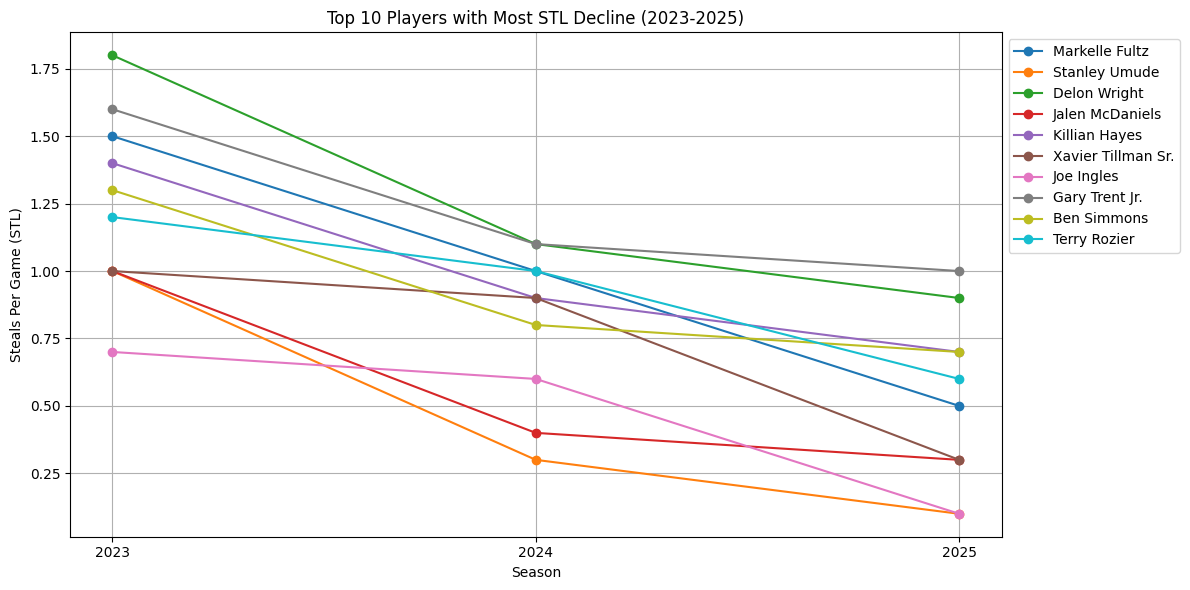

In [38]:
def plot_stl_trend(players_list, title):
    plt.figure(figsize=(12, 6))
    
    for player in players_list:
        player_data = merge_all[merge_all['Player'] == player]
        if not player_data.empty:
            stl = [player_data['STL_2023'].values[0], 
                   player_data['STL_2024'].values[0], 
                   player_data['STL_2025'].values[0]]
            seasons = [2023, 2024, 2025]
            plt.plot(seasons, stl, marker='o', label=player)
    
    plt.title(title)
    plt.xlabel('Season')
    plt.ylabel('Steals Per Game (STL)')
    plt.xticks(seasons)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


growth_players = top_stl_growth['Player'].tolist()
decline_players = top_stl_decline['Player'].tolist()

plot_stl_trend(growth_players, "Top 10 Players with Most STL Growth (2023-2025)")
plot_stl_trend(decline_players, "Top 10 Players with Most STL Decline (2023-2025)")

In [39]:
merge_all['BLK_Growth_23_24'] = (merge_all['BLK_2024'] - merge_all['BLK_2023']).round(1)
merge_all['BLK_Growth_24_25'] = (merge_all['BLK_2025'] - merge_all['BLK_2024']).round(1)
merge_all['BLK_Growth_Total'] = (merge_all['BLK_2025'] - merge_all['BLK_2023']).round(1)

top_blk_growth = merge_all[['Player', 'BLK_2023', 'BLK_2024', 'BLK_2025', 'BLK_Growth_Total']]
top_blk_growth = top_blk_growth.sort_values(by='BLK_Growth_Total', ascending=False).head(10).reset_index(drop=True)

print("\nTop 10 Blocks Improvers (2023 to 2025):\n", top_blk_growth)

top_blk_decline = merge_all[['Player', 'BLK_2023', 'BLK_2024', 'BLK_2025', 'BLK_Growth_Total']]
top_blk_decline = top_blk_decline.sort_values(by='BLK_Growth_Total', ascending=True).head(10).reset_index(drop=True)

print("\nTop 10 Blocks Decliners (2023 to 2025):\n", top_blk_decline)


Top 10 Blocks Improvers (2023 to 2025):
               Player  BLK_2023  BLK_2024  BLK_2025  BLK_Growth_Total
0      Peyton Watson       0.5       1.1       1.4               0.9
1       Goga Bitadze       0.7       1.2       1.4               0.7
2      Isaiah Mobley       0.3       0.0       1.0               0.7
3     Isaiah Stewart       0.7       0.8       1.4               0.7
4         Keon Ellis       0.1       0.5       0.8               0.7
5     Jonathan Isaac       0.4       1.2       1.1               0.7
6  Justin Champagnie       0.0       0.6       0.6               0.6
7      Jalen Johnson       0.5       0.8       1.0               0.5
8       Jaxson Hayes       0.4       0.4       0.9               0.5
9        Cody Martin       0.1       0.6       0.6               0.5

Top 10 Blocks Decliners (2023 to 2025):
               Player  BLK_2023  BLK_2024  BLK_2025  BLK_Growth_Total
0  Jaren Jackson Jr.       3.0       1.6       1.5              -1.5
1      Justin Minay

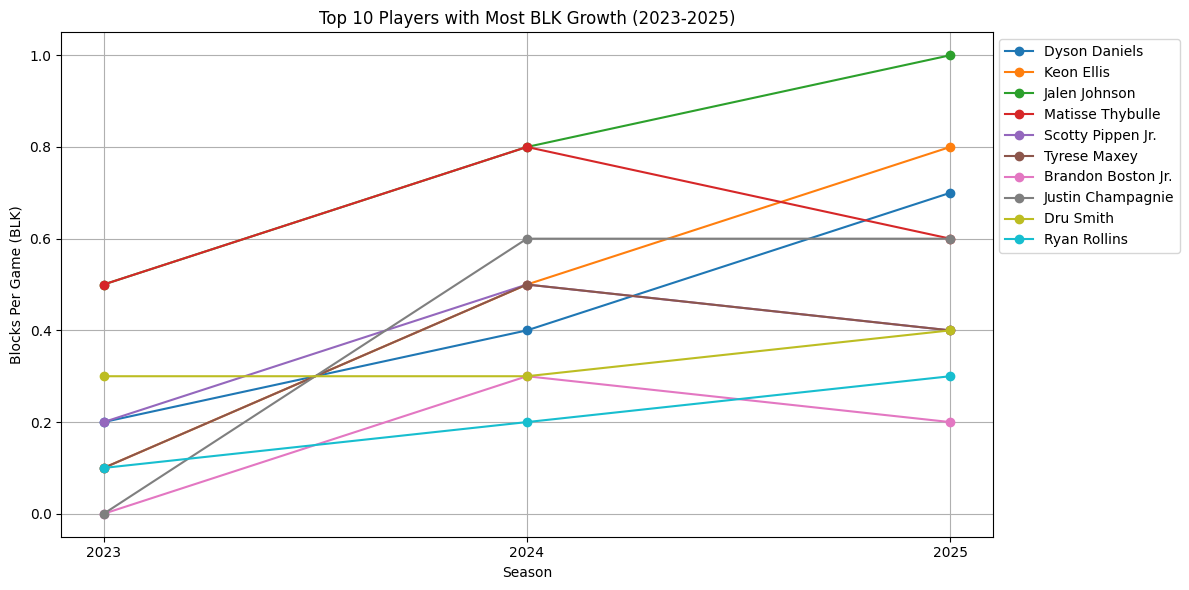

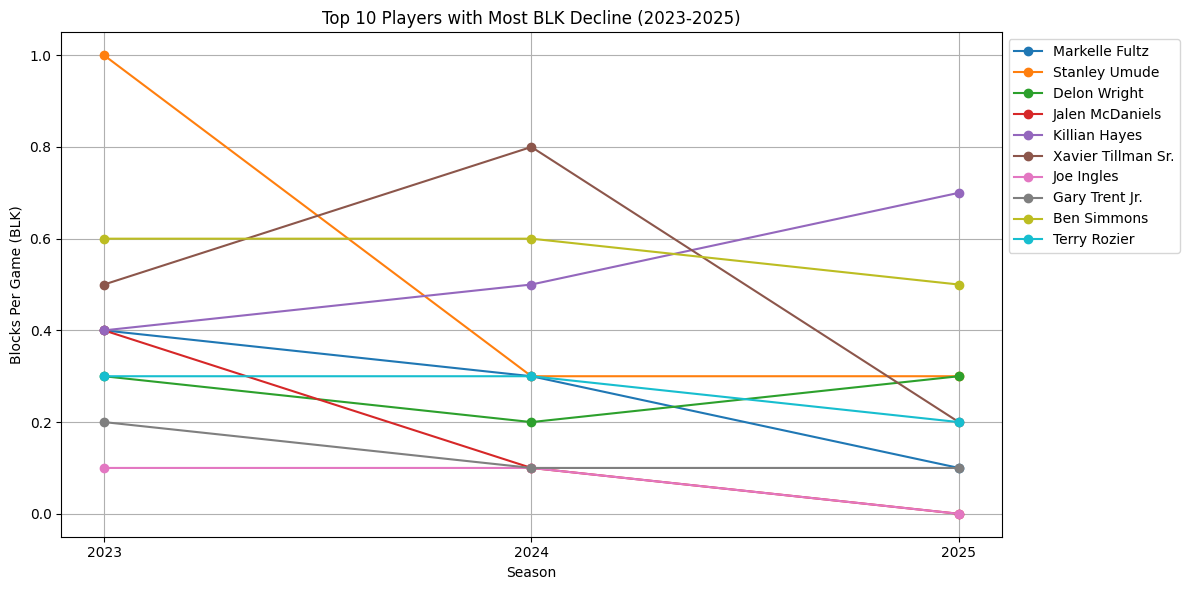

In [40]:
def plot_blk_trend(players_list, title):
    plt.figure(figsize=(12, 6))
    
    for player in players_list:
        player_data = merge_all[merge_all['Player'] == player]
        if not player_data.empty:
            blk = [player_data['BLK_2023'].values[0], 
                   player_data['BLK_2024'].values[0], 
                   player_data['BLK_2025'].values[0]]
            seasons = [2023, 2024, 2025]
            plt.plot(seasons, blk, marker='o', label=player)
    
    plt.title(title)
    plt.xlabel('Season')
    plt.ylabel('Blocks Per Game (BLK)')
    plt.xticks(seasons)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Growth_players = top_blk_growth['Player'].tolist()  
Decline_players = top_blk_decline['Player'].tolist()

plot_blk_trend(growth_players, "Top 10 Players with Most BLK Growth (2023-2025)")
plot_blk_trend(decline_players, "Top 10 Players with Most BLK Decline (2023-2025)")

### Statistical Grouping of Players by Multiple Metrics

In this section, players are grouped into four categories based on the **mean** and **standard deviation** of their performance over three seasons (2023–2025). The metrics used for this analysis include:

* **MP** (Minutes Played)
* **PTS** (Points)
* **AST** (Assists)
* **STL** (Steals)
* **BLK** (Blocks)

For each metric, players are categorized into one of the following groups:

* **High & Stable**
* **High & Volatile**
* **Low & Stable**
* **Low & Volatile**

This grouping helps identify players who consistently perform at a high level, those who are more unpredictable, and those with lower but stable contributions.
Each category is determined by comparing the player's average (mean) and variability (standard deviation) against the overall median values across all players.


In [41]:
merge_all['MP_Mean'] = merge_all[['MP_2023', 'MP_2024', 'MP_2025']].mean(axis=1).round(1)
merge_all['MP_Std'] = merge_all[['MP_2023', 'MP_2024', 'MP_2025']].std(axis=1).round(1)

summary_df_mp = merge_all[['Player', 'MP_Mean', 'MP_Std']]

def categorize_mp(row):
    if row['MP_Mean'] >= 30 and row['MP_Std'] <= 5:
        return 'High Minutes - Consistent'
    elif row['MP_Mean'] >= 30 and row['MP_Std'] > 5:
        return 'High Minutes - Variable'
    elif row['MP_Mean'] < 30 and row['MP_Std'] <= 5:
        return 'Low Minutes - Consistent'
    else:
        return 'Low Minutes - Variable'

summary_df_mp['MP_Category'] = summary_df_mp.apply(categorize_mp, axis=1)

mp_category_counts = summary_df_mp['MP_Category'].value_counts()
mp_category_counts

C:\Users\MSI\AppData\Local\Temp\ipykernel_18032\209206351.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_df_mp['MP_Category'] = summary_df_mp.apply(categorize_mp, axis=1)


MP_Category
Low Minutes - Consistent     206
High Minutes - Consistent     87
Low Minutes - Variable        77
High Minutes - Variable        1
Name: count, dtype: int64

In [42]:
summary_df_mp.head(10)
summary_df_mp

,Player,MP_Mean,MP_Std,MP_Category
0,Joel Embiid,32.8,2.3,High Minutes - Consistent
1,Luka Dončić,36.4,1.1,High Minutes - Consistent
2,Damian Lillard,35.9,0.5,High Minutes - Consistent
3,Shai Gilgeous-Alexander,34.6,0.8,High Minutes - Consistent
4,Giannis Antetokounmpo,33.8,1.6,High Minutes - Consistent
...,...,...,...,...
366,Wendell Moore Jr.,7.4,5.7,Low Minutes - Variable
367,Braxton Key,3.2,0.4,Low Minutes - Consistent
368,Cole Swider,9.2,6.7,Low Minutes - Variable
369,Vit Krejci,16.8,9.9,Low Minutes - Variable


In [43]:
merge_all['PTS_Mean'] = merge_all[['PTS_2023', 'PTS_2024', 'PTS_2025']].mean(axis=1).round(1)
merge_all['PTS_Std'] = merge_all[['PTS_2023', 'PTS_2024', 'PTS_2025']].std(axis=1).round(1)

summary_df = merge_all[['Player', 'PTS_Mean', 'PTS_Std']]

def categorize_player(row):
    if row['PTS_Mean'] >= 20 and row['PTS_Std'] <= 5:
        return 'High Scorer - Consistent'
    elif row['PTS_Mean'] >= 20 and row['PTS_Std'] > 5:
        return 'High Scorer - Variable'
    elif row['PTS_Mean'] < 20 and row['PTS_Std'] <= 5:
        return 'Low Scorer - Consistent'
    else:
        return 'Low Scorer - Variable'

summary_df['Category'] = summary_df.apply(categorize_player, axis=1)

summary_df['Category'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_18032\1130506113.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_df['Category'] = summary_df.apply(categorize_player, axis=1)


Category
Low Scorer - Consistent     314
High Scorer - Consistent     47
Low Scorer - Variable         9
High Scorer - Variable        1
Name: count, dtype: int64

In [44]:
summary_df.head(10)
summary_df

,Player,PTS_Mean,PTS_Std,Category
0,Joel Embiid,30.5,5.9,High Scorer - Variable
1,Luka Dončić,31.5,3.0,High Scorer - Consistent
2,Damian Lillard,27.1,4.4,High Scorer - Consistent
3,Shai Gilgeous-Alexander,31.4,1.3,High Scorer - Consistent
4,Giannis Antetokounmpo,30.6,0.4,High Scorer - Consistent
...,...,...,...,...
366,Wendell Moore Jr.,2.1,1.9,Low Scorer - Consistent
367,Braxton Key,1.1,0.2,Low Scorer - Consistent
368,Cole Swider,3.2,2.4,Low Scorer - Consistent
369,Vit Krejci,4.8,3.2,Low Scorer - Consistent


In [45]:
merge_all['AST_Mean'] = merge_all[['AST_2023', 'AST_2024', 'AST_2025']].mean(axis=1).round(1)
merge_all['AST_Std'] = merge_all[['AST_2023', 'AST_2024', 'AST_2025']].std(axis=1).round(1)

summary_df_ast = merge_all[['Player', 'AST_Mean', 'AST_Std']]

def categorize_ast(row):
    if row['AST_Mean'] >= 7 and row['AST_Std'] <= 2:
        return 'High Assister - Consistent'
    elif row['AST_Mean'] >= 7 and row['AST_Std'] > 2:
        return 'High Assister - Variable'
    elif row['AST_Mean'] < 7 and row['AST_Std'] <= 2:
        return 'Low Assister - Consistent'
    else:
        return 'Low Assister - Variable'

summary_df_ast['AST_Category'] = summary_df_ast.apply(categorize_ast, axis=1)

ast_category_counts = summary_df_ast['AST_Category'].value_counts()
ast_category_counts

C:\Users\MSI\AppData\Local\Temp\ipykernel_18032\1835606428.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_df_ast['AST_Category'] = summary_df_ast.apply(categorize_ast, axis=1)


AST_Category
Low Assister - Consistent     354
High Assister - Consistent     14
Low Assister - Variable         3
Name: count, dtype: int64

In [46]:
summary_df_ast.head(10)
summary_df_ast

,Player,AST_Mean,AST_Std,AST_Category
0,Joel Embiid,4.8,0.7,Low Assister - Consistent
1,Luka Dončić,8.5,1.1,High Assister - Consistent
2,Damian Lillard,7.1,0.2,High Assister - Consistent
3,Shai Gilgeous-Alexander,6.0,0.5,Low Assister - Consistent
4,Giannis Antetokounmpo,6.2,0.5,Low Assister - Consistent
...,...,...,...,...
366,Wendell Moore Jr.,0.7,0.5,Low Assister - Consistent
367,Braxton Key,0.2,0.3,Low Assister - Consistent
368,Cole Swider,0.4,0.2,Low Assister - Consistent
369,Vit Krejci,1.8,1.1,Low Assister - Consistent


In [47]:
merge_all['TRB_Mean'] = merge_all[['TRB_2023', 'TRB_2024', 'TRB_2025']].mean(axis=1).round(1)
merge_all['TRB_Std'] = merge_all[['TRB_2023', 'TRB_2024', 'TRB_2025']].std(axis=1).round(1)

summary_df_trb = merge_all[['Player', 'TRB_Mean', 'TRB_Std']]

def categorize_trb(row):
    if row['TRB_Mean'] >= 10 and row['TRB_Std'] <= 3:
        return 'High Rebounder - Consistent'
    elif row['TRB_Mean'] >= 10 and row['TRB_Std'] > 3:
        return 'High Rebounder - Variable'
    elif row['TRB_Mean'] < 10 and row['TRB_Std'] <= 3:
        return 'Low Rebounder - Consistent'
    else:
        return 'Low Rebounder - Variable'

summary_df_trb['TRB_Category'] = summary_df_trb.apply(categorize_trb, axis=1)

trb_category_counts = summary_df_trb['TRB_Category'].value_counts()
trb_category_counts

C:\Users\MSI\AppData\Local\Temp\ipykernel_18032\3913841074.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_df_trb['TRB_Category'] = summary_df_trb.apply(categorize_trb, axis=1)


TRB_Category
Low Rebounder - Consistent     358
High Rebounder - Consistent     11
Low Rebounder - Variable         2
Name: count, dtype: int64

In [48]:
summary_df_trb.head(10)
summary_df_trb

,Player,TRB_Mean,TRB_Std,TRB_Category
0,Joel Embiid,9.8,1.4,Low Rebounder - Consistent
1,Luka Dončić,8.7,0.5,Low Rebounder - Consistent
2,Damian Lillard,4.6,0.2,Low Rebounder - Consistent
3,Shai Gilgeous-Alexander,5.1,0.4,Low Rebounder - Consistent
4,Giannis Antetokounmpo,11.7,0.2,High Rebounder - Consistent
...,...,...,...,...
366,Wendell Moore Jr.,1.2,1.2,Low Rebounder - Consistent
367,Braxton Key,0.6,0.3,Low Rebounder - Consistent
368,Cole Swider,1.4,1.2,Low Rebounder - Consistent
369,Vit Krejci,2.0,1.0,Low Rebounder - Consistent


In [49]:
merge_all['STL_Mean'] = merge_all[['STL_2023', 'STL_2024', 'STL_2025']].mean(axis=1).round(1)
merge_all['STL_Std'] = merge_all[['STL_2023', 'STL_2024', 'STL_2025']].std(axis=1).round(1)

summary_df_stl = merge_all[['Player', 'STL_Mean', 'STL_Std']]

def categorize_stl(row):
    if row['STL_Mean'] >= 1.5 and row['STL_Std'] <= 0.5:
        return 'High Stealer - Consistent'
    elif row['STL_Mean'] >= 1.5 and row['STL_Std'] > 0.5:
        return 'High Stealer - Variable'
    elif row['STL_Mean'] < 1.5 and row['STL_Std'] <= 0.5:
        return 'Low Stealer - Consistent'
    else:
        return 'Low Stealer - Variable'

summary_df_stl['STL_Category'] = summary_df_stl.apply(categorize_stl, axis=1)

stl_category_counts = summary_df_stl['STL_Category'].value_counts()
stl_category_counts

C:\Users\MSI\AppData\Local\Temp\ipykernel_18032\1896099193.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_df_stl['STL_Category'] = summary_df_stl.apply(categorize_stl, axis=1)


STL_Category
Low Stealer - Consistent     349
High Stealer - Consistent     16
Low Stealer - Variable         5
High Stealer - Variable        1
Name: count, dtype: int64

In [50]:
summary_df_stl.head(10)
summary_df_stl

,Player,STL_Mean,STL_Std,STL_Category
0,Joel Embiid,1.0,0.3,Low Stealer - Consistent
1,Luka Dončić,1.5,0.2,High Stealer - Consistent
2,Damian Lillard,1.0,0.2,Low Stealer - Consistent
3,Shai Gilgeous-Alexander,1.8,0.2,High Stealer - Consistent
4,Giannis Antetokounmpo,1.0,0.2,Low Stealer - Consistent
...,...,...,...,...
366,Wendell Moore Jr.,0.4,0.2,Low Stealer - Consistent
367,Braxton Key,0.3,0.4,Low Stealer - Consistent
368,Cole Swider,0.2,0.2,Low Stealer - Consistent
369,Vit Krejci,0.5,0.2,Low Stealer - Consistent


In [51]:
merge_all.mean

<bound method DataFrame.mean of                       Player  MP_2023  PTS_2023  AST_2023  TRB_2023  STL_2023  \
0                Joel Embiid     34.6      33.1       4.2      10.2       1.0   
1                Luka Dončić     36.2      32.4       8.0       8.6       1.4   
2             Damian Lillard     36.3      32.2       7.3       4.8       0.9   
3    Shai Gilgeous-Alexander     35.5      31.4       5.5       4.8       1.6   
4      Giannis Antetokounmpo     32.1      31.1       5.7      11.8       0.8   
..                       ...      ...       ...       ...       ...       ...   
366        Wendell Moore Jr.      5.3       1.4       0.6       0.6       0.3   
367              Braxton Key      3.0       1.3       0.0       0.3       0.0   
368              Cole Swider      5.9       1.3       0.6       1.0       0.0   
369               Vit Krejci      5.7       1.2       0.6       0.9       0.2   
370         Alondes Williams      5.0       0.0       0.0       1.0       0.0

In [52]:
merge_all['BLK_Mean'] = merge_all[['BLK_2023', 'BLK_2024', 'BLK_2025']].mean(axis=1).round(1)
merge_all['BLK_Std'] = merge_all[['BLK_2023', 'BLK_2024', 'BLK_2025']].std(axis=1).round(1)

summary_df_blk = merge_all[['Player', 'BLK_Mean', 'BLK_Std']]

def categorize_blk(row):
    if row['BLK_Mean'] >= 1.5 and row['BLK_Std'] <= 0.8:
        return 'High Blocker - Consistent'
    elif row['BLK_Mean'] >= 1.5 and row['BLK_Std'] > 0.8:
        return 'High Blocker - Variable'
    elif row['BLK_Mean'] < 1.5 and row['BLK_Std'] <= 0.8:
        return 'Low Blocker - Consistent'
    else:
        return 'Low Blocker - Variable'

summary_df_blk['BLK_Category'] = summary_df_blk.apply(categorize_blk, axis=1)

blk_category_counts = summary_df_blk['BLK_Category'].value_counts()
blk_category_counts

C:\Users\MSI\AppData\Local\Temp\ipykernel_18032\1835720872.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_df_blk['BLK_Category'] = summary_df_blk.apply(categorize_blk, axis=1)


BLK_Category
Low Blocker - Consistent     361
High Blocker - Consistent     10
Name: count, dtype: int64

In [53]:
summary_df_blk.head(10)
summary_df_blk

,Player,BLK_Mean,BLK_Std,BLK_Category
0,Joel Embiid,1.4,0.5,Low Blocker - Consistent
1,Luka Dončić,0.5,0.1,Low Blocker - Consistent
2,Damian Lillard,0.2,0.1,Low Blocker - Consistent
3,Shai Gilgeous-Alexander,1.0,0.1,Low Blocker - Consistent
4,Giannis Antetokounmpo,1.0,0.2,Low Blocker - Consistent
...,...,...,...,...
366,Wendell Moore Jr.,0.1,0.1,Low Blocker - Consistent
367,Braxton Key,0.0,0.1,Low Blocker - Consistent
368,Cole Swider,0.1,0.1,Low Blocker - Consistent
369,Vit Krejci,0.3,0.3,Low Blocker - Consistent


In [54]:
merge_all.to_csv('NBA_Analysis.csv', index=False)


## Final Conclusion

This analysis of NBA player statistics from 2023 to 2025 revealed valuable insights into individual and league-wide trends. By examining averages and standard deviations of key stats such as PTS, AST, MP, TRB, STL, and BLK, we were able to:

- Detect an overall upward trend in assists and rebounds, suggesting a shift toward more collaborative and physical styles of play.
- Visualize season-by-season changes in average performance, helping us identify strategic transformations in the league.
- Group players into four clear categories based on their scoring consistency and volatility:  
  **High & Stable Scorers**, **High & Volatile Scorers**, **Low & Stable Scorers**, and **Low & Volatile Scorers**.
  This grouping was extended to other key metrics (AST, MP, STL, BLK), providing a more complete profile of players' performance patterns.

These findings can guide team managers, scouts, and analysts in player evaluation, strategic planning, and forecasting future player performance. For deeper insights, this project can be expanded with predictive modeling or team-based analysis in the future.
